<a href="https://colab.research.google.com/github/jessicasilvacodes/machinelearning-pucminas/blob/main/iris_arvore_de_decisao_pucminas_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão

Este notebook foi desenvolvido para projetos e exercícios de Machine Learning do curso de CIÊNCIA DE DADOS APLICADA À SAÚDE da PUC Minas.

Autora: Jessica Santos da Silva

Professor: Hugo de Paula

## Base de dados: Iris dataset (espécies de lírios)

https://archive.ics.uci.edu/ml/datasets/Iris/

### Descriçãpo:

3 classes (setosa, virginica, versicolor)

50 amostras por classe

4 atributos reais positivos (comp. pétala, comp. sépala, larg. pétala, larg. sépala)




In [1]:
!pip install pydotplus
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

### Carga dos dados e particionamento das bases de treinamento e teste:

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

Por padrão, 75% da base é utilizada para treinamento e 25% para testes. No código a seguir, são utilizados 15% para teste e 85% para treinamento.



In [12]:
# importa a base de dados iris
iris = datasets.load_iris()

X, y = iris.data, iris.target
class_names = iris.target_names

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

### Análise exploratória dos dados:

<Figure size 640x480 with 0 Axes>

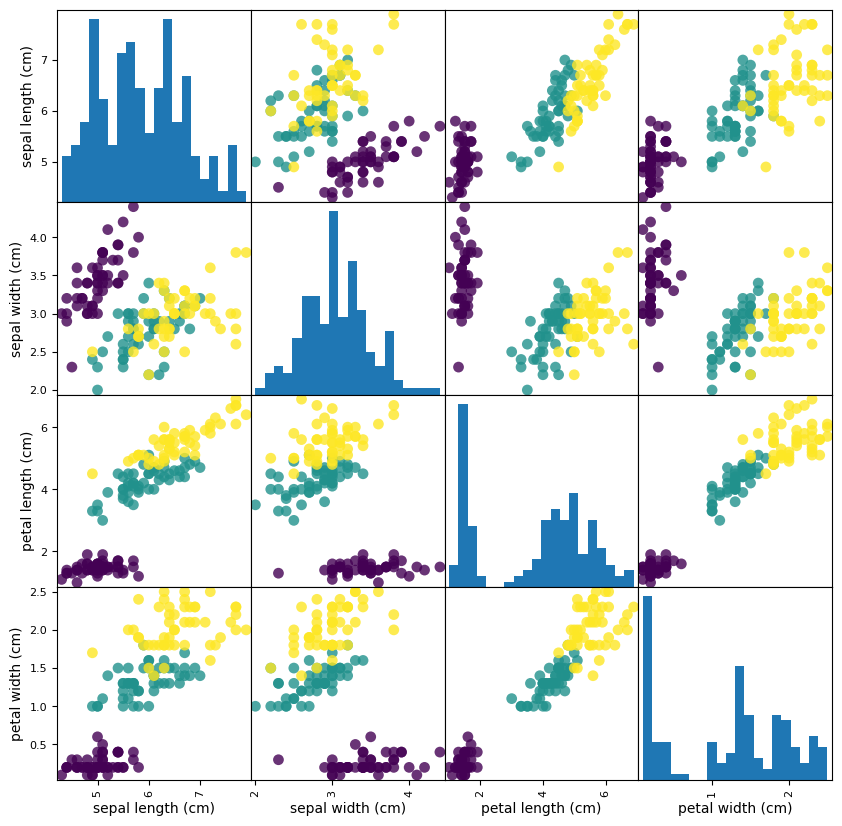

<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']],
                              columns=np.append(iris['feature_names'], ['target']))

ax2 = pd.plotting.scatter_matrix(iris_dataframe.iloc[:,:4], figsize=(10,10), c=y, marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

plt.figure()

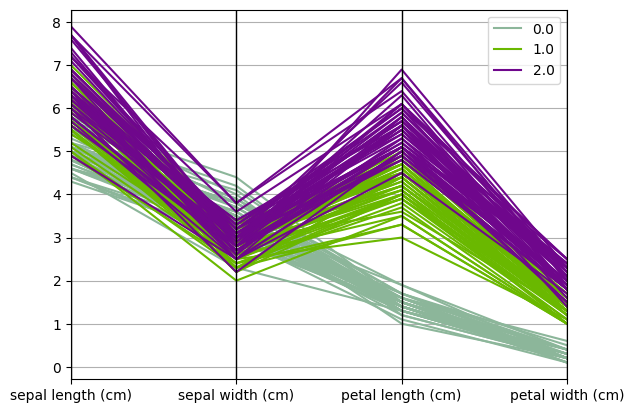

In [18]:
ax3 = pd.plotting.parallel_coordinates(iris_dataframe, 'target')

### Indução do Modelo:


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [8]:
tree_iris = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight={0: 1, 1: 1, 2: 1})
tree_iris = tree_iris.fit(X_train, y_train)
print("Acurácia (base de treinamento):", tree_iris.score(X_train, y_train))

y_pred = tree_iris.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=iris.target_names, columns=[x + "(prev)" for x in iris.target_names])
print(cnf_table)

Acurácia (base de treinamento): 1.0
Acurácia de previsão: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

            setosa(prev)  versicolor(prev)  virginica(prev)
setosa                 7                 0                0
versicolor             0                11                0
virginica              0                 0                5


### Exibição da árvore de decisão:

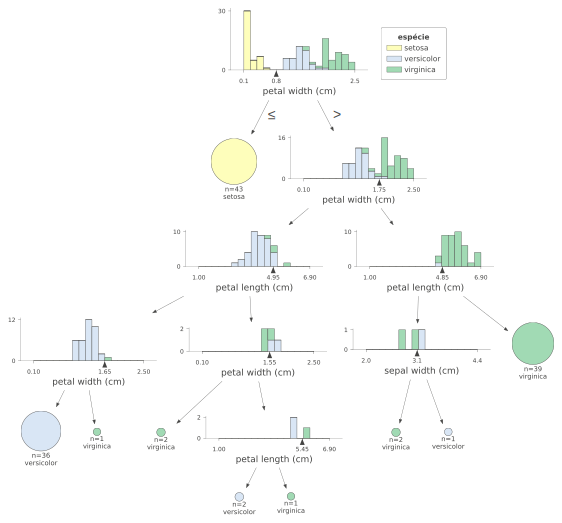

In [9]:
import dtreeviz

viz = dtreeviz.model(tree_iris,
              X_train,
              y_train,
              target_name="espécie",
              feature_names=iris.feature_names,
              class_names=["setosa", "versicolor", "virginica"])

viz.view()

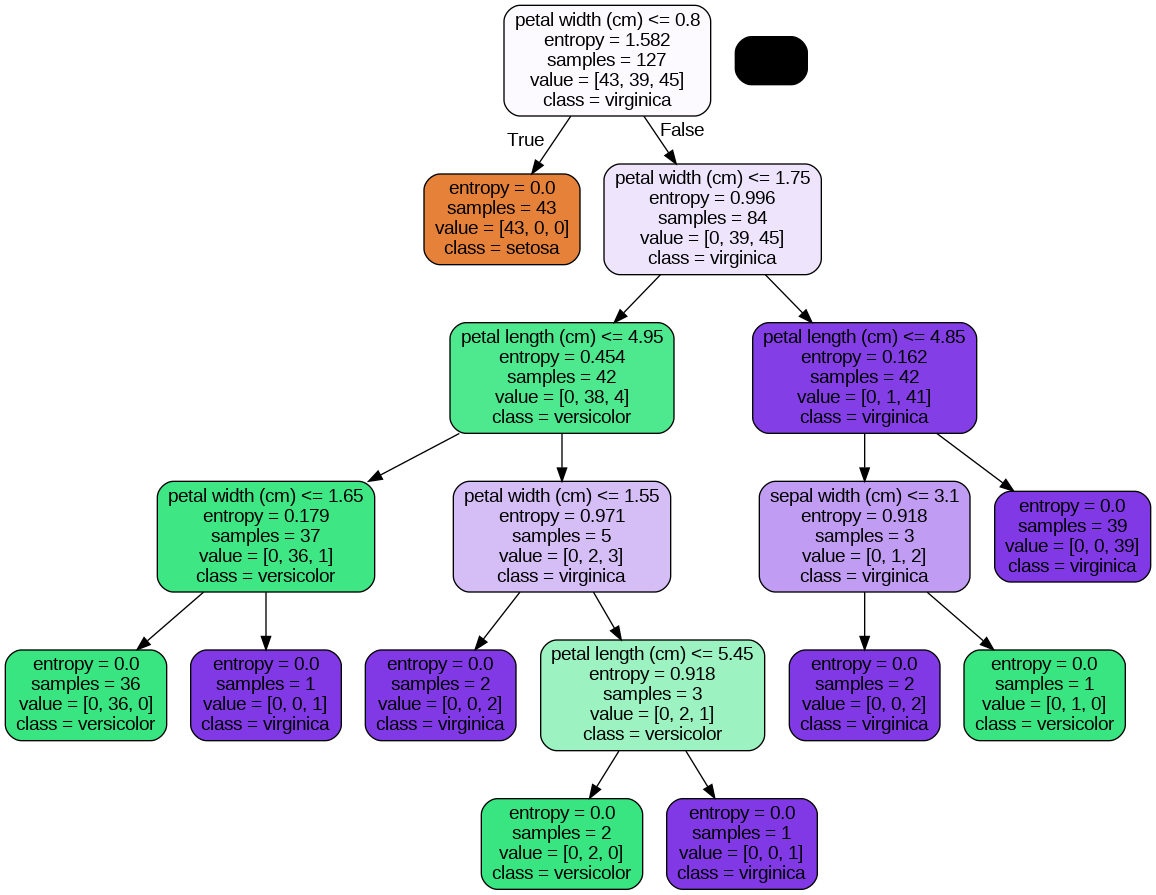

In [11]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(tree_iris, out_file=None,
                                #proportion=True,
                                rounded =True,
                                filled=True,
                                feature_names=iris.feature_names,
                                class_names=["setosa", "versicolor", "virginica"])


graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())